In [74]:
%run ./PM_functions_solve_ivp_copy.ipynb

In [75]:
M_sun = const.M_sun
G = const.G
c = const.c

m_1 = b1_mass = 3.003e-6                # [M_sun]
m_2 = b2_mass = 1                       # [M_sun]

R_S = 2*(b1_mass + b2_mass)             # [G*M_sun/c**2]

mass_bin = b1_mass + b2_mass            # [M_sun]
SMA_bin = 1.013e8                       # [G*M_sun/c**2]  #SemiMajorAxis_binary

v_redmass = np.sqrt(mass_bin/SMA_bin)   # [np.sqrt(G*M_sun/G*M_sun/c**2) = c]

x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])     # [G*M_sun/c**2]
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])     # [G*M_sun/c**2]
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])     # [c]
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])     # [c]

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

t_max = (2*np.pi*np.sqrt(SMA_bin**3/(mass_bin)))    # [np.sqrt((G*M_sun/c**2)**3/G*M_sun) = np.sqrt((G*M_sun)**2/c**6) = G*M_sun/c**3]
res = 1e5
dt = (t_max/res)                                    # [G*M_sun/c**3]

positions_N = run_model(s_cm, m_1, m_2, t_max=t_max, dt=dt, mode = 'N')[1]

In [76]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_N, CM = True, xlim=lim, ylim=lim, filename='Earth-Sun system', show=False)

In [77]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000
v_redmass = np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)
print(rel_len(x_1, x_2), rel_len(v_1, v_2))

N = 3 # Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N')[1]
positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH')[1]
positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM')[1]
positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM')[1]
# print(positions[2])

#~1 min at res=1e5

1000.0 0.031624357700987385


In [78]:
sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun

V_eff_N   = (TotalEnergy(sUnits, mode = 'N')[1]).to('J')
V_eff_EIH = (TotalEnergy(sUnits, mode = 'EIH')[1]).to('J')
V_eff_1PM = (TotalEnergy(sUnits, mode = '1PM')[1]).to('J')
V_eff_2PM = (TotalEnergy(sUnits, mode = '2PM')[1]).to('J')

sunRestMass = (M_sun*c**2).to('J')

print(f'V_eff_N = {V_eff_N/sunRestMass:.3e} M_sun*c**2 = {V_eff_N:.3e}')
print(f'V_eff_EIH = {V_eff_EIH/sunRestMass:.3e} M_sun*c**2 = {V_eff_EIH:.3e}')
print(f'V_eff_1PM = {V_eff_1PM/sunRestMass:.3e} M_sun*c**2 = {V_eff_1PM:.3e}')
print(f'V_eff_2PM = {V_eff_2PM/sunRestMass:.3e} M_sun*c**2 = {V_eff_2PM:.3e}')

V_eff_N = -1.000e+00 M_sun*c**2 = -1.787e+47 J
V_eff_EIH = -1.000e+00 M_sun*c**2 = -1.787e+47 J
V_eff_1PM = -5.011e-08 M_sun*c**2 = -8.956e+39 J
V_eff_2PM = -5.006e-08 M_sun*c**2 = -8.947e+39 J


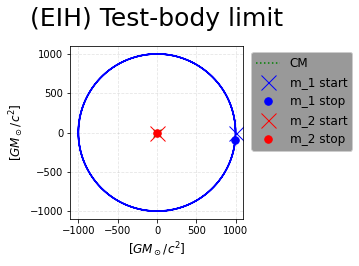

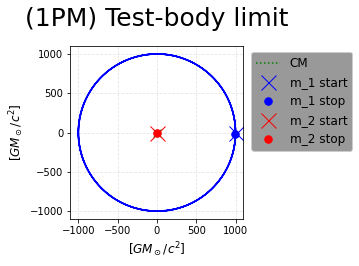

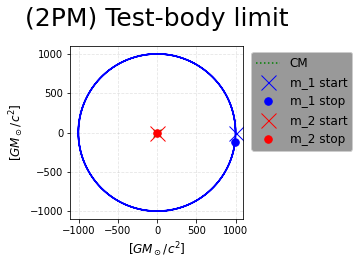

In [79]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_EIH, CM = True, xlim=lim, ylim=lim, filename='(EIH) Test-body limit', figsize=(5,5), save=False)
orbPlotter(positions_1PM, CM = True, xlim=lim, ylim=lim, filename='(1PM) Test-body limit', figsize=(5,5), save=False)
orbPlotter(positions_2PM, CM = True, xlim=lim, ylim=lim, filename='(2PM) Test-body limit', figsize=(5,5), save=False)

## 2) Testbody limit w/ Johans initial conditions with eccentricity

In [80]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun
s_cm = sToCOM(s)

V_eff_N   = (TotalEnergy(sUnits, mode = 'N')[1])
V_eff_EIH = (TotalEnergy(sUnits, mode = 'EIH')[1])
V_eff_1PM = (TotalEnergy(sUnits, mode = '1PM')[1])
V_eff_2PM = (TotalEnergy(sUnits, mode = '2PM')[1])
print(f'V_eff_N = {V_eff_N/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_N:.4e}')
print(f'V_eff_EIH = {V_eff_EIH/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_EIH:.4e}')
print(f'V_eff_1PM = {V_eff_1PM/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_1PM:.4e}')
print(f'V_eff_2PM = {V_eff_2PM/(M_sun*c**2):.4e} M_sun*c**2 = {V_eff_2PM:.4e}')


N =  α*6# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e5
dt = t_max/res

positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N')[1]
positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH')[1]
positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM')[1]
positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM')[1]
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

V_eff_N = -1.0001e+00 M_sun*c**2 = -1.7873e+47 kg m2 / s2
V_eff_EIH = -1.0001e+00 M_sun*c**2 = -1.7873e+47 kg m2 / s2
V_eff_1PM = -8.7535e-08 M_sun*c**2 = -1.5643e+40 kg m2 / s2
V_eff_2PM = -8.7485e-08 M_sun*c**2 = -1.5634e+40 kg m2 / s2


C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:27: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:56: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:97: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))


In [81]:
eccOutput_N = eccentricity(positions_N[0])
eccOutput_EIH = eccentricity(positions_EIH[0])
eccOutput_1PM = eccentricity(positions_1PM[0])
eccOutput_2PM = eccentricity(positions_2PM[0])
print(f'meanEccentricity_N = {eccOutput_N[0]:.3f}')
print(f'meanEccentricity_EIH = {eccOutput_EIH[0]:.3f}')
print(f'meanEccentricity_1PM = {eccOutput_1PM[0]:.3f}')
print(f'meanEccentricity_2PM = {eccOutput_2PM[0]:.3f}')

eccOutput_N[3], eccOutput_2PM[3]

meanEccentricity_N = 0.752
meanEccentricity_EIH = 0.736
meanEccentricity_1PM = 0.607
meanEccentricity_2PM = 0.727


(array([[0.74979369, 0.74996143, 0.754388  , 0.75259214, 0.75230358]]),
 array([[0.76577261, 0.75408728, 0.73505472, 0.7090944 , 0.67264186]]))

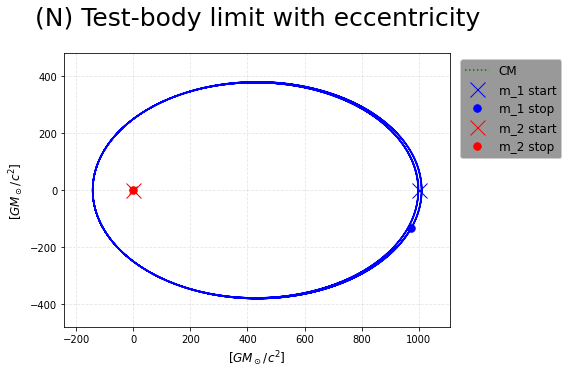

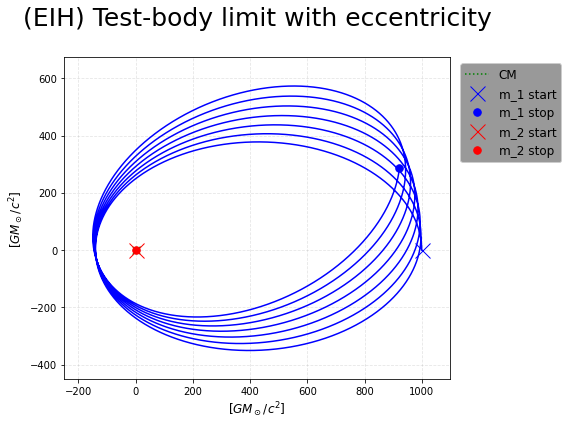

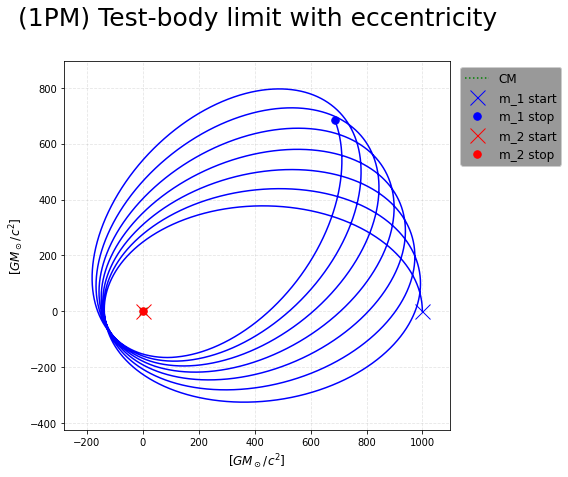

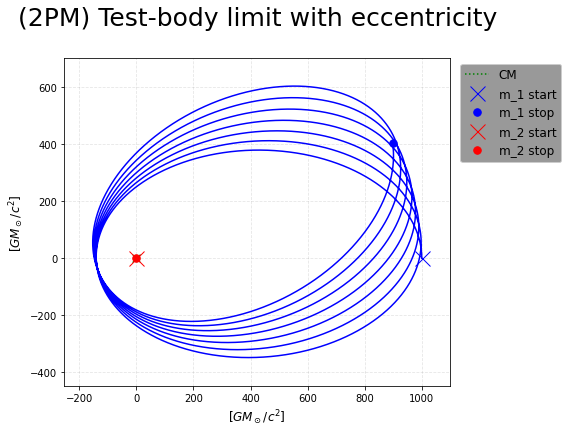

In [82]:
lim = 0
# lims = (-lim, lim)
orbPlotter(positions_N,   CM = True, xlim=lim, ylim=lim, filename='(N) Test-body limit with eccentricity', save=False)
orbPlotter(positions_EIH, CM = True, xlim=lim, ylim=lim, filename='(EIH) Test-body limit with eccentricity', save=False) 
orbPlotter(positions_1PM, CM = True, xlim=lim, ylim=lim, filename='(1PM) Test-body limit with eccentricity', save=False)
orbPlotter(positions_2PM, CM = True, xlim=lim, ylim=lim, filename='(2PM) Test-body limit with eccentricity', save=False)

The perihelionShift in the three cases are (N:) 0.013°, (EIH:) 3.709°, (1PM): 7.645°, (2PM): 4.224°


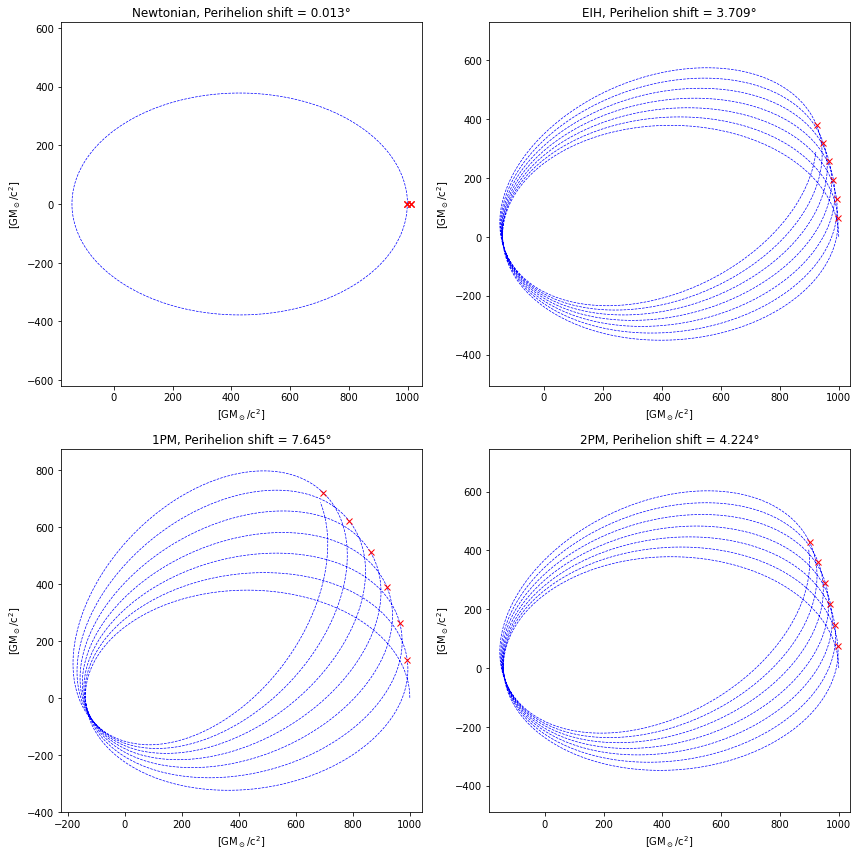

In [83]:
rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_EIH, peakIndices_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = False, sharey = False)

axs[0,0].set_aspect('equal', adjustable='datalim')
axs[0,0].plot(positions_N[0,0][0:14300], positions_N[0,1][0:14300], 'b--', lw=0.7)
axs[0,0].set_title(f'Newtonian, Perihelion shift = {perihelionShift_N*180/np.pi:.3f}°')
axs[0,0].set_ylim(-700, 700)
axs[0,0].set_xlabel('$\mathrm{[G M_\odot/c^2]}$')
axs[0,0].set_ylabel('$\mathrm{[G M_\odot/c^2]}$')

axs[0,1].set_aspect('equal', adjustable='datalim')
axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].set_title(f'EIH, Perihelion shift = {perihelionShift_EIH*180/np.pi:.3f}°')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())
axs[0,1].set_xlabel('$\mathrm{[G M_\odot/c^2]}$')
axs[0,1].set_ylabel('$\mathrm{[G M_\odot/c^2]}$')

axs[1,0].set_aspect('equal', adjustable='datalim')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].set_title(f'1PM, Perihelion shift = {perihelionShift_1PM*180/np.pi:.3f}°')
axs[1,0].set_xlabel('$\mathrm{[G M_\odot/c^2]}$')
axs[1,0].set_ylabel('$\mathrm{[G M_\odot/c^2]}$')

axs[1,1].set_aspect('equal', adjustable='datalim')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].set_title(f'2PM, Perihelion shift = {perihelionShift_2PM*180/np.pi:.3f}°')
axs[1,1].set_xlabel('$\mathrm{[G M_\odot/c^2]}$')
axs[1,1].set_ylabel('$\mathrm{[G M_\odot/c^2]}$')

for i in range(len(peakPositions_EIH)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('test body perihelion shift.jpg', dpi=600)

    
    

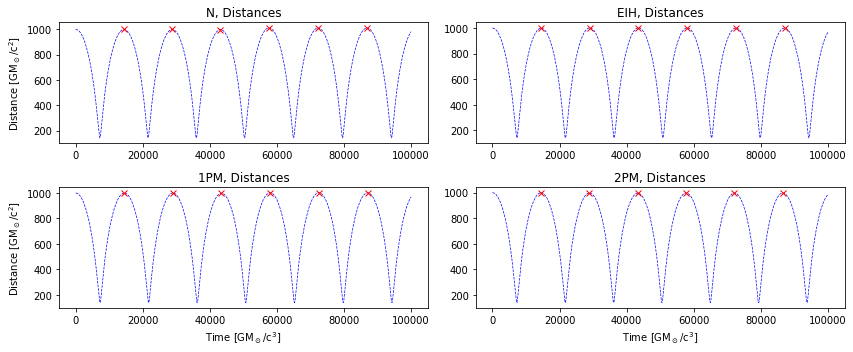

In [84]:
x = range(len(rs_N))

fig, axs = plt.subplots(2,2, figsize=(12,5), sharex = False, sharey = False)

# axs[0,0].set_aspect('equal', adjustable='datalim')
axs[0,0].plot(x, rs_N, 'b--', lw=0.7)
axs[0,0].set_title('N, Distances')
# axs[0,0].set_ylim(0, 1200)
# axs[0,0].set_xlabel('Time $\mathrm{[G M_\odot/c^3]}$')
axs[0,0].set_ylabel('Distance $\mathrm{[G M_\odot/c^2]}$')

# axs[0,1].set_aspect('equal', adjustable='datalim')
axs[0,1].plot(x, rs_EIH, 'b--', lw=0.7)
axs[0,1].set_title('EIH, Distances')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())
# axs[0,1].set_xlabel('Time $\mathrm{[G M_\odot/c^2]}$')
# axs[0,1].set_ylabel('Distance $\mathrm{[G M_\odot/c^3]}$')

# axs[1,0].set_aspect('equal', adjustable='datalim')
axs[1,0].plot(x, rs_1PM, 'b--', lw=0.7)
axs[1,0].set_title('1PM, Distances')
axs[1,0].set_xlabel('Time $\mathrm{[G M_\odot/c^3]}$')
axs[1,0].set_ylabel('Distance $\mathrm{[G M_\odot/c^2]}$')

# axs[1,1].set_aspect('equal', adjustable='datalim')
axs[1,1].plot(x, rs_2PM, 'b--', lw=0.7)
axs[1,1].set_title('2PM, Distances')
axs[1,1].set_xlabel('Time $\mathrm{[G M_\odot/c^3]}$')
# axs[1,1].set_ylabel('Distance $\mathrm{[G M_\odot/c^3]}$')

for i in range(len(peakIndices_N)):
    axs[0,0].plot(peakIndices_N[i], rs_N[peakIndices_N[i]], 'rx')
    axs[0,1].plot(peakIndices_EIH[i], rs_EIH[peakIndices_EIH[i]], 'rx')
    axs[1,0].plot(peakIndices_1PM[i], rs_1PM[peakIndices_1PM[i]], 'rx')
    axs[1,1].plot(peakIndices_2PM[i], rs_2PM[peakIndices_2PM[i]], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('test body perihelion shift_distances.jpg', dpi=600)


In [85]:
G = const.G
c = const.c

x_1, x_2, v_1, v_2, m_1, m_2 = sUnits

# δxN = np.abs(max(positions_N[0,0][0:14300]) - min(positions_N[0,0][0:14300]))
# δyN = np.abs(max(positions_N[0,1][0:14300]) - min(positions_N[0,1][0:14300]))

# a_N = max(δxN/2, δyN/2)*M_sun*G/c**2
# b_N = min(δxN/2, δyN/2)*M_sun*G/c**2

# e = np.sqrt(1 - b_N**2/a_N**2)

# # Calculating the analytically predicted value of the precession angle (in radians), and how many times it divides 2π radians.
# Δφr = 6*G*np.pi*(m_1 + m_2)/((1 - e**2)*a_N*c**2)


# M = m_1 + m_2
# μ = m_1*m_2/M
# ν = μ/M

# v_vec = v_1 - v_2
# γ_1 = 1/np.sqrt(1 - np.dot(v_1,v_1)/c**2)
# γ_rel = 1/np.sqrt(1 - np.dot(v_vec,v_vec)/c**2)

# E = M*np.sqrt(1 + 2*ν*(γ_rel - 1))*c**2

# r_vec = x_1 - x_2
# p_vec = m_1*γ_rel*v_1
# J_vec = np.cross(r_vec, p_vec)
# J = np.linalg.norm(J_vec)


# ΔΦr_poul = 3/2*np.pi*(G*M*μ/(J*c))**2*(E/(M*c**2))*(5*γ_rel**2 - 1)

Δφa = perihelionShift_analytical(sUnits, mode = 'N')
print(f'Δφ (in radians) = {Δφa*np.pi/180:.3f}, Δφ (in angles) = {Δφa:.3f}')
ΔΦa_poul = perihelionShift_analytical(sUnits, mode='2PM')
print(f'ΔΦ_poul (in radians) = {ΔΦa_poul*np.pi/180:.3f}, ΔΦ_poul (in angles) = {ΔΦa_poul:.3f}')

Δφ (in radians) = 0.075, Δφ (in angles) = 4.319
ΔΦ_poul (in radians) = 0.075, ΔΦ_poul (in angles) = 4.321


## Eccentricity failure

In [95]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

mass_bin = b1_mass + b2_mass
R_S = 2*(b1_mass + b2_mass)
SMA_bin = 100

y = 5.5

α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2
s_cm = sToCOM(s)

N =  α*y# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 1e7
dt = t_max/res

positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N')[1]
positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH')[1]
positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM')[1]
positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM')[1]

rs_N, peakIndices_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_EIH, peakIndices_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
rs_1PM, peakIndices_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakIndices_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])
    
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\3364869254.py:19: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\3364869254.py:45: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\3364869254.py:84: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))


The perihelionShift in the three cases are (N:) 0.011°, (EIH:) 5.863°, (1PM): 59.266°, (2PM): 34.034°


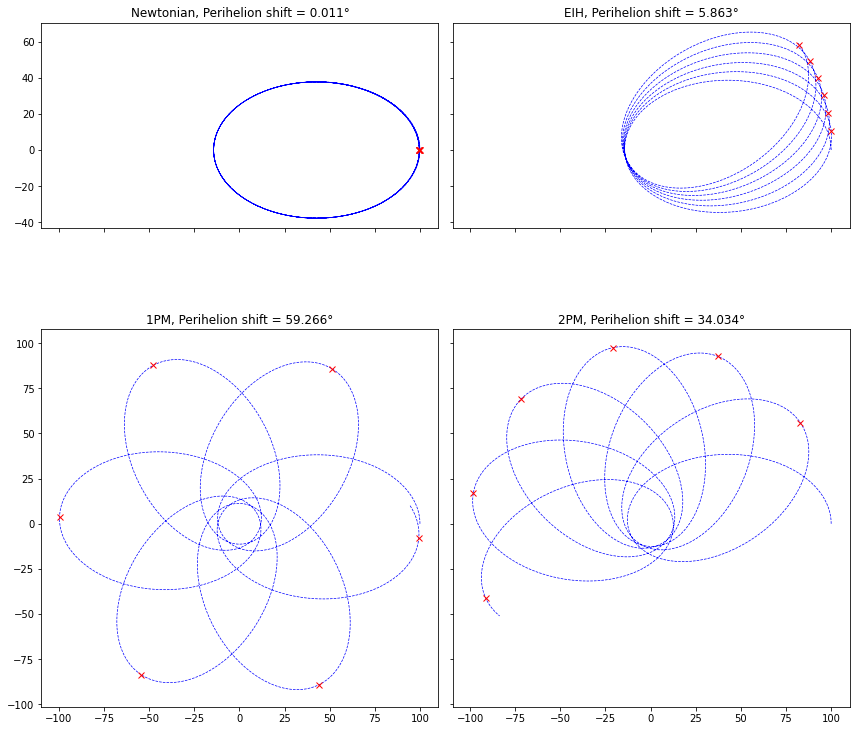

In [96]:
fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = 'row')

axs[0,0].set_aspect('equal')
axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].set_title(f'Newtonian, Perihelion shift = {perihelionShift_N*180/np.pi:.3f}°')
# axs[0,0].set_ylim(-1200, 1200)

axs[0,1].set_aspect('equal')
axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].set_title(f'EIH, Perihelion shift = {perihelionShift_EIH*180/np.pi:.3f}°')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())

axs[1,0].set_aspect('equal')
axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].set_title(f'1PM, Perihelion shift = {perihelionShift_1PM*180/np.pi:.3f}°')

axs[1,1].set_aspect('equal')
axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].set_title(f'2PM, Perihelion shift = {perihelionShift_2PM*180/np.pi:.3f}°')

for i in range(len(peakPositions_EIH)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
fig.tight_layout()
# fig.savefig('Eccentricity COM failure.jpg', dpi=300)

    
    

# SCATTERING

In [102]:
m_1 = 1e-6
m_2 = 5

x_1 = np.array([-1e4, 500.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.9,   0.])
v_2 = np.array([0.,    0.])

s = x_1, x_2, v_1, v_2, m_1, m_2
sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun
s_cm = sToCOM(s)


t_max = 2e4
res = 1e7
dt = t_max/res

positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N')[1]
positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH')[1]
positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM')[1]
positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM')[1]


# For the graph in the paper
# m_1 = 1e-6
# m_2 = 5

# R_S = 2*(m_1 + m_2)

# x_1 = np.array([-3e3, 400.])
# x_2 = np.array([0.,    0.])
# v_1 = np.array([0.4,   0.])
# v_2 = np.array([0.,    0.])

C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\3364869254.py:19: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))


In [103]:

V_eff_N = TotalEnergy(sUnits, mode = 'N')[1]
V_eff_EIH= TotalEnergy(sUnits, mode = 'EIH')[1]
V_eff_1PM = TotalEnergy(sUnits, mode = '1PM')[1]
V_eff_2PM = TotalEnergy(sUnits, mode = '2PM')[1]

print(f'V_eff_N = {V_eff_N:.2e}')
print(f'V_eff_EIH = {V_eff_EIH:.2e}')
print(f'V_eff_1PM = {V_eff_1PM:.2e}')
print(f'V_eff_2PM = {V_eff_2PM:.2e}')

V_eff_N = -8.94e+47 kg m2 / s2
V_eff_EIH = -8.94e+47 kg m2 / s2
V_eff_1PM = 2.31e+41 kg m2 / s2
V_eff_2PM = 2.31e+41 kg m2 / s2


In [104]:
θ_N = scatteringAngle_analytical(sUnits, mode = 'N')[0]
θ_1PM = scatteringAngle_analytical(sUnits, mode = '1PM')[0]
θ_2PM = scatteringAngle_analytical(sUnits, mode = '2PM')[0]

θ_N, θ_1PM, θ_2PM

(1.4146390199874948, 2.5606272312736373, 2.64079394419957)

θ_N = 1.41°
θ_EIH = 8.33°
θ_1PM = 2.62°
θ_2PM = 2.58°


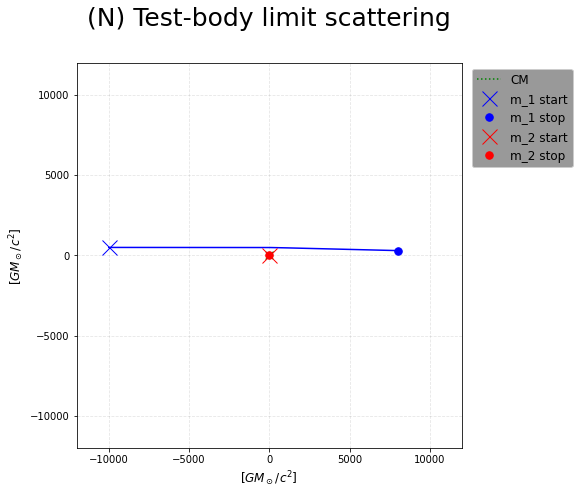

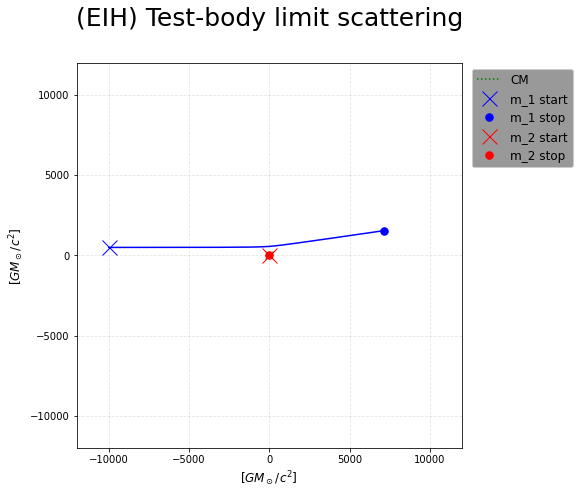

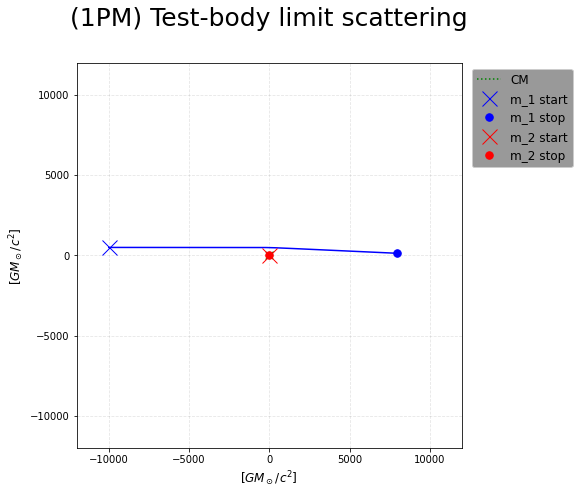

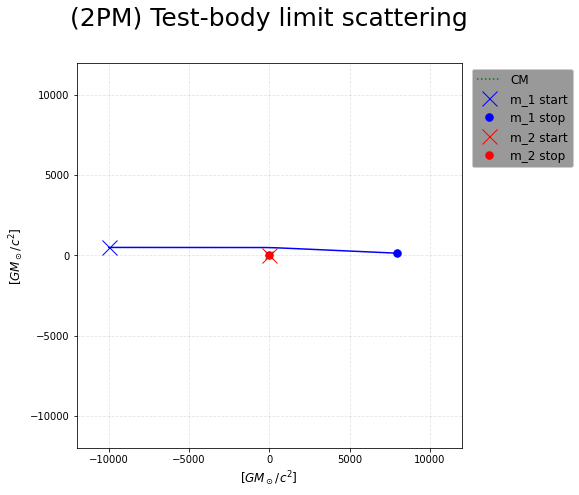

In [105]:
lim = 1.2e4
# lims = 0
lims = (-lim,lim)
orbPlotter(positions_N, CM = True, filename='(N) Test-body limit scattering', xlim=lims, ylim=lims, save=False)
orbPlotter(positions_EIH, CM = True, filename='(EIH) Test-body limit scattering', xlim=lims, ylim=lims, save=False)
orbPlotter(positions_1PM, CM = True, filename='(1PM) Test-body limit scattering', xlim=lims, ylim=lims, save=False)
orbPlotter(positions_2PM, CM = True, filename='(2PM) Test-body limit scattering', xlim=lims, ylim=lims, save=False)

print(f'θ_N = {scatteringAngle(positions_N):.2f}°')
print(f'θ_EIH = {scatteringAngle(positions_EIH):.2f}°')
print(f'θ_1PM = {scatteringAngle(positions_1PM):.2f}°')
print(f'θ_2PM = {scatteringAngle(positions_2PM):.2f}°')

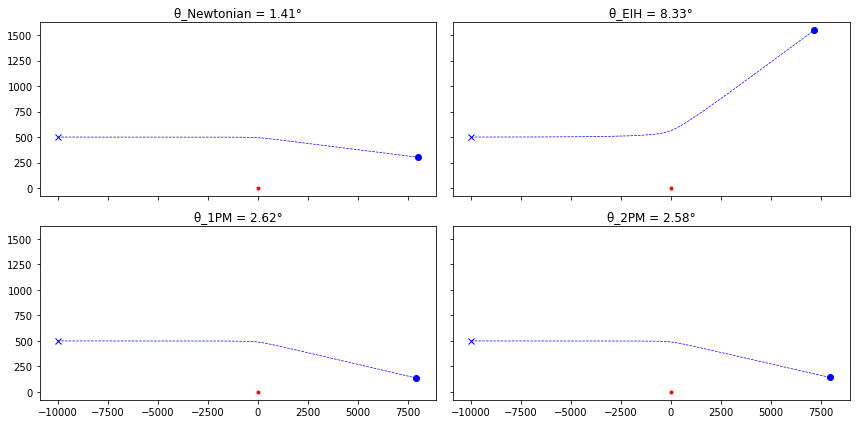

In [106]:
fig, axs = plt.subplots(2,2, figsize=(12,6), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'bo')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title(f'θ_Newtonian = {scatteringAngle(positions_N):.2f}°')
# axs[0,0].set_ylim(-350, 1700)

axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_EIH[0,0][-1], positions_EIH[0,1][-1], 'bo')
axs[0,1].plot(positions_EIH[0,0][0], positions_EIH[0,1][0], 'bx')
axs[0,1].set_title(f'θ_EIH = {scatteringAngle(positions_EIH):.2f}°')

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'bo')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title(f'θ_1PM = {scatteringAngle(positions_1PM):.2f}°')

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'bo')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title(f'θ_2PM = {scatteringAngle(positions_2PM):.2f}°')
# for i in range(len(peakPositions_EIH)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
fig.tight_layout()
# fig.savefig('test body scattering 2.jpg', dpi=600)


In [107]:
%run ./PM_functions_solve_ivp_copy.ipynb
m_1 = 1e-6
m_2 = 1

R_S = 2*(m_1 + m_2)

x_1 = np.array([-1e4, 400.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.3,   0.])
v_2 = np.array([0.,    0.])
s = x_1, x_2, v_1, v_2, m_1, m_2
sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun
s_cm = sToCOM(s)


t_max = 5e4
res = 1e4
dt = t_max/res

leng = 11

θs_N = np.zeros(leng)
θs_N_an = np.zeros(leng)
Ls_N = np.zeros(leng)

θs_EIH = np.zeros(leng)
θs_EIH_an = np.zeros(leng)
Ls_EIH = np.zeros(leng)

θs_1PM = np.zeros(leng)
θs_1PM_an = np.zeros(leng)
Ls_1PM = np.zeros(leng)

θs_2PM = np.zeros(leng)
θs_2PM_an = np.zeros(leng)
Ls_2PM = np.zeros(leng)


for i in range(leng):
    v_1 = np.array([0.3,   0.])
    v_1 += np.array([0.03*i, 0])
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2
    sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun
    s_cm = sToCOM(s)

    positions_N = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'N')[1]
    positions_EIH = run_model(s_cm, m_1, m_2, t_max, dt, mode = 'EIH')[1]
    positions_1PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '1PM')[1]
    positions_2PM = run_model(s_cm, m_1, m_2, t_max, dt, mode = '2PM')[1]

    θs_N[i] = scatteringAngle(positions_N)
    θs_N_an[i], Ls_N[i] = scatteringAngle_analytical(sUnits, mode ='N')

    θs_EIH[i] = scatteringAngle(positions_EIH)
    Ls_EIH[i] = scatteringAngle_analytical(sUnits, mode ='N')[1]

    θs_1PM[i] = scatteringAngle(positions_1PM)
    θs_1PM_an[i], Ls_1PM[i] = scatteringAngle_analytical(sUnits, mode ='1PM')

    θs_2PM[i] = scatteringAngle(positions_2PM)
    θs_2PM_an[i], Ls_2PM[i] = scatteringAngle_analytical(sUnits, mode ='2PM')

# 5m 5s at res = 3e4


[0.3 0. ]
[0.33 0.  ]


C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:27: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:56: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))
C:\Users\Productivity\AppData\Local\Temp\ipykernel_31148\4264450967.py:97: RuntimeWarning: invalid value encountered in sqrt
  γ_1 = 1/np.sqrt(1 - np.dot(v_1, v_1))


[0.36 0.  ]
[0.39 0.  ]
[0.42 0.  ]
[0.45 0.  ]
[0.48 0.  ]
[0.51 0.  ]
[0.54 0.  ]
[0.57 0.  ]
[0.6 0. ]


In [109]:
m_1 = 1e-6
m_2 = 1

R_S = 2*(m_1 + m_2)

x_1 = np.array([-1e4, 400.])
x_2 = np.array([0.,    0.])
v_1 = np.array([0.3,   0.])
v_2 = np.array([0.,    0.])
s = x_1, x_2, v_1, v_2, m_1, m_2
sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun


t_max = 5e4
res = 1e4
dt = t_max/res

leng = 11

θ_test = np.zeros(leng)


for i in range(leng):
    v_1 = np.array([0.3,   0.])
    v_1 += np.array([0.03*i, 0])
    print(v_1)
    s = x_1, x_2, v_1, v_2, m_1, m_2
    sUnits = x_1*G*M_sun/c**2, x_2*G*M_sun/c**2, v_1*c, v_2*c, m_1*M_sun, m_2*M_sun

    θ_test[i] = otherScatteringAngleAnalytical(sUnits)

[0.3 0. ]


UnitConversionError: Can only apply 'subtract' function to quantities with compatible dimensions

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,6), sharex = True, sharey = True)


axs[0,0].plot(positions_N[0,0], positions_N[0,1], 'b--', lw=0.7)
axs[0,0].plot(0,0,'r.')
axs[0,0].plot(positions_N[0,0][-1], positions_N[0,1][-1], 'bo')
axs[0,0].plot(positions_N[0,0][0], positions_N[0,1][0], 'bx')
axs[0,0].set_title(f'θ_Newtonian = {scatteringAngle(positions_N):.2f}°')
axs[0,0].set_ylim(-350, 1700)

axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].plot(0,0,'r.')
axs[0,1].plot(positions_EIH[0,0][-1], positions_EIH[0,1][-1], 'bo')
axs[0,1].plot(positions_EIH[0,0][0], positions_EIH[0,1][0], 'bx')
axs[0,1].set_title(f'θ_EIH = {scatteringAngle(positions_EIH):.2f}°')

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].plot(0,0,'r.')
axs[1,0].plot(positions_1PM[0,0][-1], positions_1PM[0,1][-1], 'bo')
axs[1,0].plot(positions_1PM[0,0][0], positions_1PM[0,1][0], 'bx')
axs[1,0].set_title(f'θ_1PM = {scatteringAngle(positions_1PM):.2f}°')

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].plot(0,0,'r.')
axs[1,1].plot(positions_2PM[0,0][-1], positions_2PM[0,1][-1], 'bo')
axs[1,1].plot(positions_2PM[0,0][0], positions_2PM[0,1][0], 'bx')
axs[1,1].set_title(f'θ_2PM = {scatteringAngle(positions_2PM):.2f}°')
# for i in range(len(peakPositions_EIH)):
#     axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
#     axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
#     axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
#     axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
fig.tight_layout()


In [ ]:
x = np.linspace(Ls_N[0], Ls_N[-1], 11)
ones = np.ones_like(x)
fig, axs = plt.subplots(2,1, figsize=(12,12), sharex = True, sharey=True)
axs[0].plot(Ls_N, θs_N, 'y', label='N'), axs[0].plot(Ls_EIH, θs_EIH,'g', label='EIH'), axs[0].plot(Ls_1PM, θs_1PM, 'b', label='1PM'), axs[0].plot(Ls_2PM, θs_2PM, 'r', label='2PM')
axs[0].plot(x,ones, 'k:', lw=0.5, label='θ = 1.0')
# axs[0].set_xlabel('Angular momentum L [kg m^2/s]')
axs[0].set_ylabel('Scattering angle θ [°]')
axs[0].ticklabel_format(scilimits=(0,3))
axs[0].legend()
axs[0].set_title('θ(L) - Simulated')


axs[1].plot(Ls_N, θs_N_an,'y--', label='N_an'), axs[1].plot(Ls_1PM, θs_1PM_an, 'b--', label='1PM_an'), axs[1].plot(Ls_2PM, θs_2PM_an, 'r--', label='2PM_an'), axs[1].plot(Ls_2PM, θ_test, 'k--', label='test')
axs[1].plot(x,ones, 'k:' , lw=0.5, label='θ = 1.0')
axs[1].set_xlabel('Angular momentum L [kg m^2/s]')
axs[1].set_ylabel('Scattering angle θ [°]')
axs[1].ticklabel_format(scilimits=(0,3))
axs[1].legend()
axs[1].set_title('θ(L) - Analytical')

fig.tight_layout()
# fig.savefig('Scattering angle of L multiplot.jpg', dpi=300)